In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [2]:
exterior_designs = tf.keras.utils.image_dataset_from_directory('home-styles/Exterior/interior-designs', batch_size=64, label_mode='categorical')

Found 62607 files belonging to 19 classes.


In [3]:
exterior_class_names = exterior_designs.class_names
for i, class_name in enumerate(exterior_class_names):
    print(f"Class name: {class_name}, Integer label: {i}")

Class name: Asian, Integer label: 0
Class name: Coastal, Integer label: 1
Class name: Contemporary, Integer label: 2
Class name: Craftsman, Integer label: 3
Class name: Eclectic, Integer label: 4
Class name: Farmhouse, Integer label: 5
Class name: French-Country, Integer label: 6
Class name: Industrial, Integer label: 7
Class name: Mediterranean, Integer label: 8
Class name: Mid-Century-Modern, Integer label: 9
Class name: Modern, Integer label: 10
Class name: Rustic, Integer label: 11
Class name: Scandinavian, Integer label: 12
Class name: Shabby-Chic, Integer label: 13
Class name: Southwestern, Integer label: 14
Class name: Traditional, Integer label: 15
Class name: Transitional, Integer label: 16
Class name: Tropical, Integer label: 17
Class name: Victorian, Integer label: 18


In [4]:
import numpy as np

data_iterator = exterior_designs.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

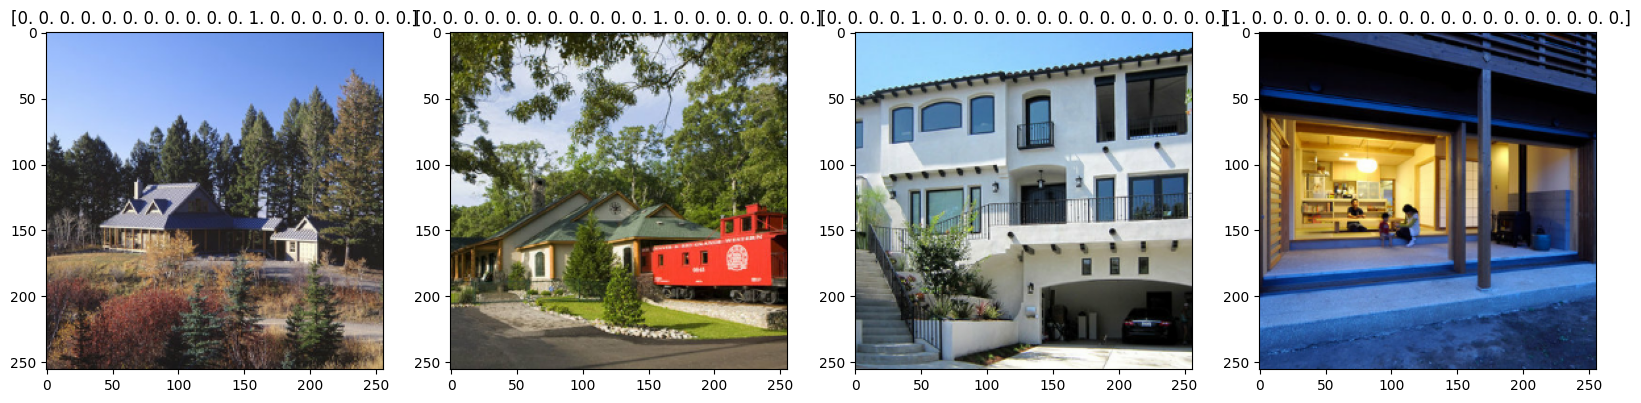

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
#Normalization of the images
exterior_designs = exterior_designs.map(lambda x, y: (x / 255.0, y))

In [8]:
train_size = int(len(exterior_designs)*.8)
val_size = int(len(exterior_designs)*.2)

train = exterior_designs.take(train_size)
val = exterior_designs.skip(train_size).take(val_size)

In [9]:
def image_augmentation(image, label):
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_hue(image, 0.2)
    image = tf.image.random_saturation(image, 0.5, 1.0)
    return image, label

In [10]:
augmented_train = train.map(image_augmentation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


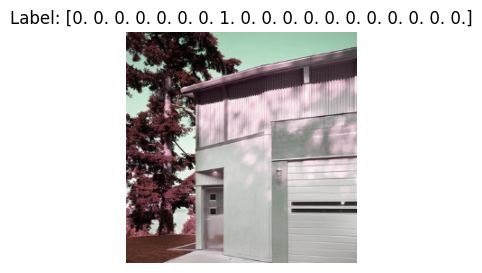

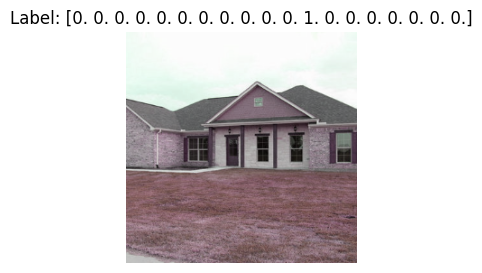

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


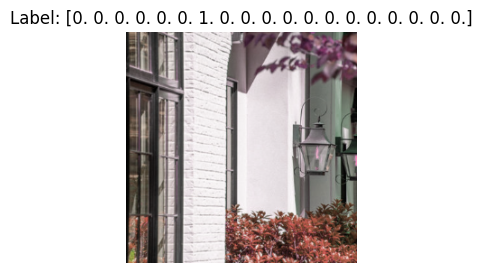

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


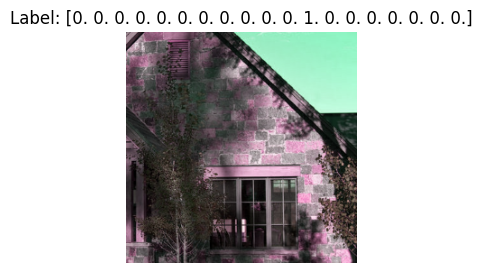

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


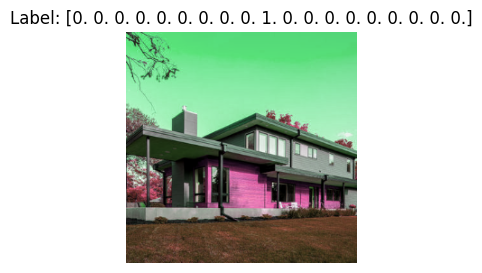

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


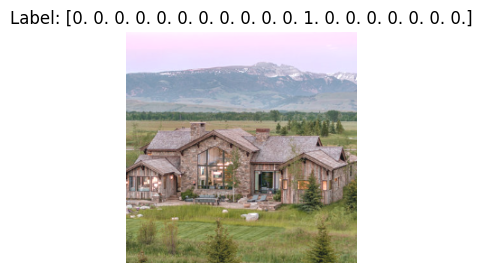

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


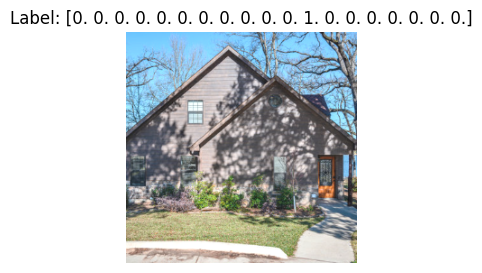

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


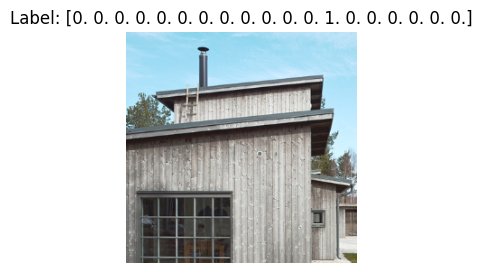

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


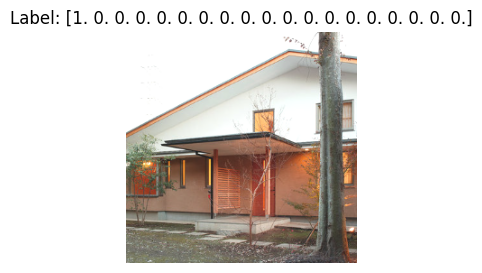

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


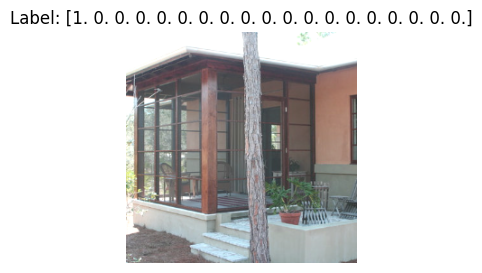

In [11]:
# Visualizing the augmented training dataset
for images, labels in augmented_train.take(2):
    for i in range(min(5, len(images))):
        image = images[i].numpy() 
        label = labels[i].numpy()
        plt.subplots(figsize=(3,3))
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')  # Hide axes
        plt.show()

In [12]:
def plot_history(history):
    # Figure Configuration to show two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    # Plot one to visualize the loss from the history
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)
    ax1.legend(['Loss', 'Val_Loss'])
    # Plot two to visualize the accuracy from the history
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend(['Accuracy', 'Val_Accuracy'])
    plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
def train_model(filter_1, filter_2, filter_3, kernel, num_of_epochs, training_dataset, validation_dataset):
    model = Sequential()
    model.add(Conv2D(filter_1, (kernel,kernel), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_2, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_3, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(19, activation='softmax'))
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.summary()
    logdir = 'logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    history = model.fit(training_dataset, epochs=num_of_epochs, validation_data=validation_dataset, callbacks=[tensorboard_callback])
    return model, history

In [22]:
model, history = train_model(32, 64, 64, 3, 5, augmented_train, val)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 19)             │         4,883 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,807,059 (56.48 MB)

 Trainable params: 14,807,059 (56.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 179s 225ms/step - accuracy: 0.2816 - loss: 0.1783 - val_accuracy: 0.3382 - val_loss: 0.1606
Epoch 2/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 175s 223ms/step - accuracy: 0.3568 - loss: 0.1566 - val_accuracy: 0.3994 - val_loss: 0.1480
Epoch 3/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 176s 224ms/step - accuracy: 0.4028 - loss: 0.1465 - val_accuracy: 0.4010 - val_loss: 0.1464
Epoch 4/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 174s 221ms/step - accuracy: 0.4451 - loss: 0.1376 - val_accuracy: 0.4181 - val_loss: 0.1451
Epoch 5/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 174s 221ms/step - accuracy: 0.4964 - loss: 0.1270 - val_accuracy: 0.4190 - val_loss: 0.1520


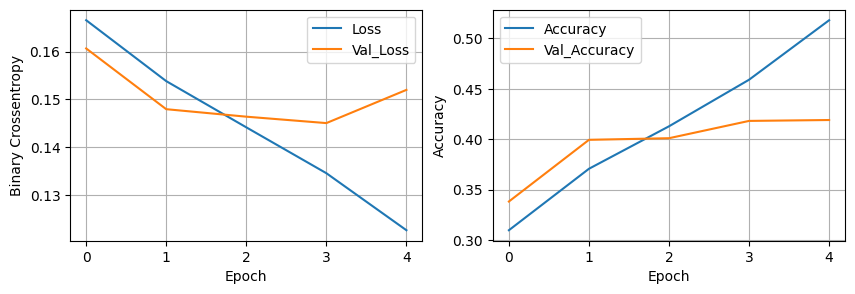

In [24]:
plot_history(history)

In [26]:
model.save('house-styles-models/exterior-style-classification-model.keras')